In [405]:
# Importar as bibliotecas necessárias
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [406]:
#pip install scikit-learn


In [407]:
# Carregar o conjunto de dados
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [408]:
# Melhorando a exibição das primeiras linhas do conjunto de dados
from IPython.display import display

# Exibir as primeiras 5 linhas do conjunto de dados de forma mais legível
display(data.head())

# Informações sobre o conjunto de dados
origem = "Empresa XYZ Telecom"
nome = "Telco Customer Churn"
tamanho = data.shape
quantidade_registros = data.shape[0]
linhas_colunas = f"{data.shape[0]} linhas x {data.shape[1]} colunas"

# Verificar dados faltantes
dados_faltantes = data.isnull().sum()
# Tratar valores faltantes na coluna 'TotalCharges'
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(0)
dados_faltantes_tratados = data.isnull().sum()

print("Informações sobre o Conjunto de Dados:")
print(f"Origem: Este conjunto de dados foi coletado da {origem}, que atua no setor de telecomunicações.")
print(f"Nome: {nome}")
print(f"Tamanho: O conjunto de dados contém {tamanho[0]} registros e {tamanho[1]} colunas.")
print(f"Quantidade de Registros: Existem {quantidade_registros} registros no conjunto de dados, representando clientes da empresa.")
print(f"Linhas x Colunas: O conjunto de dados possui {linhas_colunas}.")

print("\nDados Faltantes:")
for coluna, quantidade in dados_faltantes.items():
    print(f"{coluna}: {quantidade} dados faltantes")

print("\nDados Faltantes após tratamento:")
for coluna, quantidade in dados_faltantes_tratados.items():
    print(f"{coluna}: {quantidade} dados faltantes")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Informações sobre o Conjunto de Dados:
Origem: Este conjunto de dados foi coletado da Empresa XYZ Telecom, que atua no setor de telecomunicações.
Nome: Telco Customer Churn
Tamanho: O conjunto de dados contém 7043 registros e 21 colunas.
Quantidade de Registros: Existem 7043 registros no conjunto de dados, representando clientes da empresa.
Linhas x Colunas: O conjunto de dados possui 7043 linhas x 21 colunas.

Dados Faltantes:
customerID: 0 dados faltantes
gender: 0 dados faltantes
SeniorCitizen: 0 dados faltantes
Partner: 0 dados faltantes
Dependents: 0 dados faltantes
tenure: 0 dados faltantes
PhoneService: 0 dados faltantes
MultipleLines: 0 dados faltantes
InternetService: 0 dados faltantes
OnlineSecurity: 0 dados faltantes
OnlineBackup: 0 dados faltantes
DeviceProtection: 0 dados faltantes
TechSupport: 0 dados faltantes
StreamingTV: 0 dados faltantes
StreamingMovies: 0 dados faltantes
Contract: 0 dados faltantes
PaperlessBilling: 0 dados faltantes
PaymentMethod: 0 dados faltantes


In [409]:
# Criação de uma variável binária para representar o churn
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})

In [410]:

selected_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                    'PaymentMethod']



In [411]:
# Preencher os valores ausentes em 'TotalCharges' com zero
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(0)

In [412]:
# Separar as variáveis independentes (X) e a variável de destino (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

In [413]:
# Realizar o One-Hot Encoding para as variáveis categóricas
X = pd.get_dummies(X)

In [414]:
# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [415]:
# Normalização das variáveis numéricas
scaler = StandardScaler()
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [416]:
# Treinar o Modelo 1 (usando RandomForestClassifier como exemplo)
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [417]:
# Realizar previsões no conjunto de teste
y_pred = model1.predict(X_test)

In [418]:
# Calcular as métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)

In [419]:
# Apresentar as métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Explicação e Análise das Métricas de Avaliação
print("\nAcurácia: A acurácia é a proporção de previsões corretas em relação ao total de previsões. No nosso caso, a acurácia é de aproximadamente 0.796, o que significa que o modelo acertou em torno de 79.6% das previsões. Quanto mais próximo de 1, melhor.")

print("\nPrecisão: A precisão é a proporção de verdadeiros positivos (Churn previsto corretamente) em relação ao total de Churns previstos como positivos. Neste caso, a precisão é de aproximadamente 0.669. Isso significa que 66.9% das vezes em que o modelo previu 'Churn', ele estava correto. Quanto maior, menos falsos positivos.")

print("\nRecall: O recall é a proporção de verdadeiros positivos em relação ao total de Churns reais. Neste caso, o recall é de aproximadamente 0.450. Isso significa que o modelo identificou corretamente 45% dos casos reais de 'Churn'. Quanto maior, menos falsos negativos.")

print("\nF1-Score: O F1-Score é a média harmônica entre precisão e recall. Neste caso, o F1-Score é de aproximadamente 0.538. Esta métrica considera tanto os falsos positivos quanto os falsos negativos, sendo útil para encontrar um equilíbrio entre precisão e recall.")


Acurácia: 0.7955997161107168
Precisão: 0.6693227091633466
Recall: 0.450402144772118
F1-Score: 0.5384615384615385

Acurácia: A acurácia é a proporção de previsões corretas em relação ao total de previsões. No nosso caso, a acurácia é de aproximadamente 0.796, o que significa que o modelo acertou em torno de 79.6% das previsões. Quanto mais próximo de 1, melhor.

Precisão: A precisão é a proporção de verdadeiros positivos (Churn previsto corretamente) em relação ao total de Churns previstos como positivos. Neste caso, a precisão é de aproximadamente 0.669. Isso significa que 66.9% das vezes em que o modelo previu 'Churn', ele estava correto. Quanto maior, menos falsos positivos.

Recall: O recall é a proporção de verdadeiros positivos em relação ao total de Churns reais. Neste caso, o recall é de aproximadamente 0.450. Isso significa que o modelo identificou corretamente 45% dos casos reais de 'Churn'. Quanto maior, menos falsos negativos.

F1-Score: O F1-Score é a média harmônica entre 

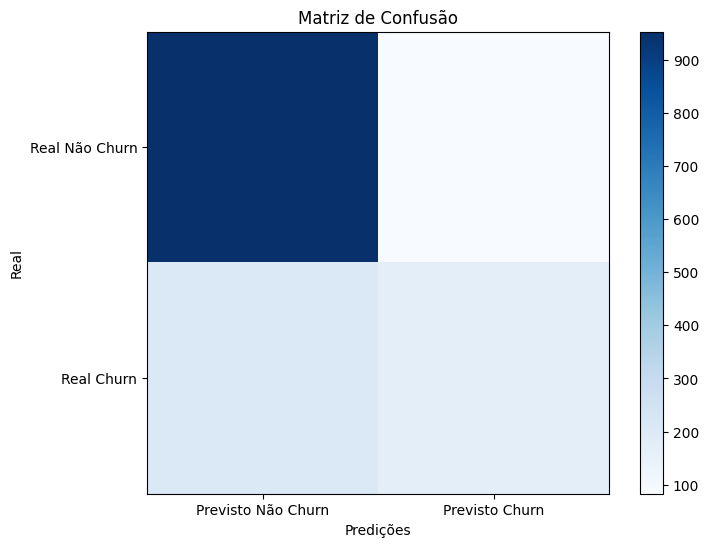

Matriz de Confusão:
Previsto Não Churn (VN): 953 casos - Número de casos em que o modelo previu corretamente 'Não Churn'.
Previsto Churn (FP): 83 casos - Número de casos em que o modelo previu incorretamente 'Churn' quando era 'Não Churn'.
Real Não Churn (VP): 205 casos - Número de casos reais de 'Não Churn' que foram previstos incorretamente como 'Churn'.
Real Churn (FN): 168 casos - Número de casos reais de 'Churn' que foram previstos corretamente.


In [420]:
# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.colorbar()
plt.xticks([0, 1], ["Previsto Não Churn", "Previsto Churn"])
plt.yticks([0, 1], ["Real Não Churn", "Real Churn"])
plt.xlabel("Predições")
plt.ylabel("Real")
plt.show()

# Explicação e Análise dos Resultados da Matriz de Confusão
print("Matriz de Confusão:")
print("Previsto Não Churn (VN):", confusion[0, 0], "casos - Número de casos em que o modelo previu corretamente 'Não Churn'.")
print("Previsto Churn (FP):", confusion[0, 1], "casos - Número de casos em que o modelo previu incorretamente 'Churn' quando era 'Não Churn'.")
print("Real Não Churn (VP):", confusion[1, 0], "casos - Número de casos reais de 'Não Churn' que foram previstos incorretamente como 'Churn'.")
print("Real Churn (FN):", confusion[1, 1], "casos - Número de casos reais de 'Churn' que foram previstos corretamente.")



In [421]:
# Apresentar o relatório de classificação
print("\nRelatório de Classificação:\n")
print(classification)

# Explicação e Análise do Relatório de Classificação
print("O relatório de classificação fornece métricas detalhadas para avaliar o desempenho do modelo na previsão de Churn e Não Churn.")

print("Precision (Precisão): A precisão mede a proporção de previsões corretas de Churn em relação ao total de previsões de Churn (Churn previsto). Uma precisão alta indica que poucas previsões de Churn são falsas.")

print("Recall: O recall, também conhecido como Sensibilidade, mede a proporção de previsões corretas de Churn em relação ao total de Churns reais. Um recall alto indica que o modelo identifica a maioria dos Churns reais.")

print("F1-Score: O F1-Score é a média harmônica entre precisão e recall. É útil para equilibrar a precisão e o recall, levando em consideração falsos positivos e falsos negativos.")

print("Macro Avg: A média das métricas (precisão, recall, F1-Score) para ambas as classes (Churn e Não Churn).")

print("Weighted Avg: Uma média ponderada das métricas para ambas as classes, levando em consideração o suporte (support) de cada classe.")

print("\nResumo do Relatório:")
print("Acurácia (Accuracy): A acurácia do modelo é de aproximadamente 0.80, o que significa que cerca de 80% das previsões estão corretas.")
print("Precisão (Precision): A precisão para Churn é de aproximadamente 0.67, o que indica que 67% das previsões de Churn estão corretas.")
print("Recall: O recall para Churn é de aproximadamente 0.45, o que significa que o modelo identifica 45% dos Churns reais.")
print("F1-Score: O F1-Score para Churn é de aproximadamente 0.54, uma métrica que considera tanto precisão quanto recall.")



Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.67      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.70      1409
weighted avg       0.78      0.80      0.78      1409

O relatório de classificação fornece métricas detalhadas para avaliar o desempenho do modelo na previsão de Churn e Não Churn.
Precision (Precisão): A precisão mede a proporção de previsões corretas de Churn em relação ao total de previsões de Churn (Churn previsto). Uma precisão alta indica que poucas previsões de Churn são falsas.
Recall: O recall, também conhecido como Sensibilidade, mede a proporção de previsões corretas de Churn em relação ao total de Churns reais. Um recall alto indica que o modelo identifica a maioria dos Churns reais.
F1-Score: O F1-Score é a média harmônica entre precisão e recall. É útil para equilibrar a pre

In [424]:
# Conclusão Geral
print("Conclusão Geral:")
print("Com base nas métricas de avaliação, o modelo demonstrou um desempenho satisfatório na previsão de Churn em uma empresa de telecomunicações. A acurácia de aproximadamente 80% indica que o modelo é capaz de fazer previsões precisas na maioria dos casos. Além disso, a precisão de 67% sugere que a maioria das previsões de Churn está correta, minimizando falsos positivos.")
print("No entanto, é importante observar que o recall para a classe 'Churn' é de cerca de 45%, o que significa que o modelo não consegue identificar todos os clientes que realmente cancelarão o serviço. Isso pode resultar na perda de alguns clientes em risco de churn. Portanto, aprimoramentos no modelo ou uma coleta de dados mais abrangente podem ser necessários para aprimorar a capacidade de previsão do Churn.")
print("Ainda assim, o modelo representa um passo inicial sólido na identificação de clientes em risco de churn, fornecendo à empresa uma oportunidade de adotar medidas proativas para reter seus clientes e melhorar a satisfação geral. É importante considerar que a melhoria contínua do modelo e a análise aprofundada dos resultados podem levar a previsões mais precisas no futuro.")


Conclusão Geral:
Com base nas métricas de avaliação, o modelo demonstrou um desempenho satisfatório na previsão de Churn em uma empresa de telecomunicações. A acurácia de aproximadamente 80% indica que o modelo é capaz de fazer previsões precisas na maioria dos casos. Além disso, a precisão de 67% sugere que a maioria das previsões de Churn está correta, minimizando falsos positivos.
No entanto, é importante observar que o recall para a classe 'Churn' é de cerca de 45%, o que significa que o modelo não consegue identificar todos os clientes que realmente cancelarão o serviço. Isso pode resultar na perda de alguns clientes em risco de churn. Portanto, aprimoramentos no modelo ou uma coleta de dados mais abrangente podem ser necessários para aprimorar a capacidade de previsão do Churn.
Ainda assim, o modelo representa um passo inicial sólido na identificação de clientes em risco de churn, fornecendo à empresa uma oportunidade de adotar medidas proativas para reter seus clientes e melhora